Importing the data using zip file

In [1]:
from zipfile import ZipFile
dataset = '/content/twitter_dataset.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


Importing the dependencies

In [14]:
!pip install scikit-learn==0.13


  Using cached scikit-learn-0.13.tar.gz (3.5 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re    # For regular expressions
from nltk.corpus import stopwords  # nltk is natural language toolkit
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Processing

In [6]:
# Naming the columns and reading the dataset again
column_names = ['target','id','date','flag','user','text']
twitter_data = pd.read_csv ("/content/archive (2)/twitter_dataset..csv", names=column_names, encoding='ISO-8859-1')

In [7]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
twitter_data.shape

(1048505, 6)

In [9]:
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [10]:
twitter_data.duplicated().sum()

73

In [11]:
twitter_data = twitter_data.drop_duplicates()

In [12]:
twitter_data.duplicated().sum()

0

In [13]:
# Checking the distribution of target column
twitter_data['target'].value_counts()

target
0    799988
4    248444
Name: count, dtype: int64

Converting the target from 4 to 1.

In [16]:
twitter_data.replace({'target':{4:1}}, inplace=True)

In [17]:
twitter_data['target'].value_counts()

target
0    799988
1    248444
Name: count, dtype: int64

799988 negative tweets and 248444 positive tweets.

Performing Stemming.
It is a process of reducing a word to its Root word.


In [19]:
port_stem = PorterStemmer()
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ', content) # Remove anything which is dows not belong to a-z and A-Z
  stemmed_content = stemmed_content.lower() # Converting all the text to lower string
  stemmed_content = stemmed_content.split() # Split the words and add to the list
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # To reduce the word to root word. And removing the stop words.
  stemmed_content = ' '.join(stemmed_content) # Join the words because they were splitted.

  return stemmed_content


In [20]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)

In [21]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [22]:
print(twitter_data['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1048500               renelannt mousesport com holi grail hm
1048501    el smacki quot gilbert amp sullivan quot mikad...
1048502                           paparazziprncss makin sure
1048503                                 rainbowlooov miss yu
1048504                                            loov morn
Name: stemmed_content, Length: 1048432, dtype: object


In [26]:
twitter_data = twitter_data.drop(['id', 'date', 'flag', 'user', 'text'], axis=1) # Removing the unwanted columns

In [28]:
twitter_data['target'].value_counts()

target
0    799988
1    248444
Name: count, dtype: int64

To check the values of Yes v/s no. Clearly the data is not equal


<Axes: ylabel='Type'>

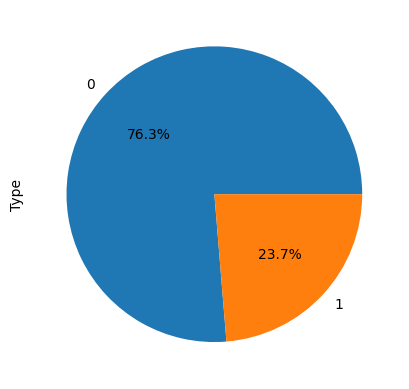

In [29]:
twitter_data.groupby('target').size().plot(kind='pie',
                                       y = "target",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [30]:
df = twitter_data.copy()

In [31]:
X_test = df['stemmed_content']
Y_test = df['target']

Up sampling the data

In [33]:
#Seperate the majority and minority classes
df_majority = df[df['target']==0]
df_minority = df[df['target']==1]

In [35]:
from sklearn.utils import resample
# Upsample the minority class (where target = 1) to match the count of the majority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Sample with replacement
                                 n_samples=799988,  # Number of samples to match majority class
                                 random_state=42)  # For reproducibility

In [36]:
# Combine the upsampled minority class with the original majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [37]:
# Shuffle the upsampled data
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [38]:
df

,target,stemmed_content
0,0,switchfoot http twitpic com zl awww bummer sho...
1,0,upset updat facebook text might cri result sch...
2,0,kenichan dive mani time ball manag save rest g...
3,0,whole bodi feel itchi like fire
4,0,nationwideclass behav mad see
...,...,...
1048500,1,renelannt mousesport com holi grail hm
1048501,1,el smacki quot gilbert amp sullivan quot mikad...
1048502,1,paparazziprncss makin sure
1048503,1,rainbowlooov miss yu


<Axes: ylabel='Type'>

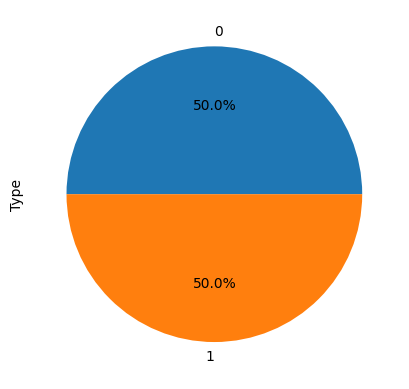

In [40]:
df_upsampled.groupby('target').size().plot(kind='pie',
                                       y = "target",
                                       label = "Type",
                                       autopct='%1.1f%%')

After sampling, now the data is balanced and ready for machine learning

In [41]:
twitter_data=df_upsampled.copy()

In [67]:
# Seperating the data and Label
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [69]:
print(X.shape, X_train.shape, X_test.shape)

(1599976,) (1279980,) (319996,)


Converting the text data to numerical data

In [70]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [71]:
print(X_train)


  (0, 247026)	0.4195069958800098
  (0, 22951)	0.1708601108459633
  (0, 176240)	0.15784663574486893
  (0, 182562)	0.15563614190850666
  (0, 53026)	0.3071951853284256
  (0, 325782)	0.16274543084689286
  (0, 131927)	0.42219383142577005
  (0, 93910)	0.48233876119263475
  (0, 93973)	0.2942276251404117
  (0, 247164)	0.3568744449469677
  (1, 89040)	0.2441792409720119
  (1, 59080)	0.3566544137543141
  (1, 177361)	0.1242225885549966
  (1, 110204)	0.1082567468357714
  (1, 104196)	0.28230146444759885
  (1, 80594)	0.21798622033184
  (1, 47271)	0.46626085226045294
  (1, 211179)	0.1448834664899388
  (1, 5279)	0.3231886030138049
  (1, 300115)	0.19452753475705678
  (1, 68973)	0.11346565469817241
  (1, 60277)	0.23219244006699272
  (1, 9287)	0.18555425715278742
  (1, 337761)	0.4206077045466241
  (2, 241322)	0.301741310876695
  :	:
  (1279976, 71058)	0.8675998119178943
  (1279976, 57183)	0.4972630756048902
  (1279977, 131715)	0.5063944809744452
  (1279977, 192012)	0.35852278331238613
  (1279977, 332269)	

In [72]:
print(X_test)

  (0, 313448)	0.591819256230274
  (0, 279959)	0.5012976118796549
  (0, 79802)	0.5193179180626551
  (0, 9489)	0.35883084072842664
  (1, 327296)	0.20469936444976156
  (1, 320227)	0.291906460439881
  (1, 113826)	0.4356855708840996
  (1, 101534)	0.4234809380406194
  (1, 71525)	0.47952881621922033
  (1, 57733)	0.5232426601514354
  (2, 326997)	0.39650714423134004
  (2, 245017)	0.44670441936734273
  (2, 169439)	0.23106705921052123
  (2, 57265)	0.48729997536027064
  (2, 49130)	0.34218163808610536
  (2, 35036)	0.48507290277811155
  (3, 275373)	0.5656762347736545
  (3, 247925)	0.5797656588411625
  (3, 169439)	0.37838228787986694
  (3, 69766)	0.4480056053885617
  (4, 237641)	0.44680168602826353
  (4, 114915)	0.36247124627460076
  (4, 97448)	0.3765886583870302
  (4, 44188)	0.37142079451461396
  (4, 19907)	0.623867313427165
  :	:
  (319993, 161711)	0.1758147747318634
  (319993, 78393)	0.2205351274486128
  (319993, 44747)	0.26536833868817833
  (319993, 43870)	0.4330440329415039
  (319993, 31299)	0.2

Applying Logistic regression

In [73]:
model = LogisticRegression(max_iter=1000)

In [74]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [75]:
#Accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)


In [76]:
print('Accuracy score on the training data=', training_data_accuracy )

Accuracy score on the training data= 0.8377599649994532


In [77]:
#Accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print ("Accuracy score on the test data=", test_data_accuracy)

Accuracy score on the test data= 0.8126820335254191


In [80]:
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# Precision
precision = precision_score(Y_test, Y_pred)

# Recall
recall = recall_score(Y_test, Y_pred)

# F1-score
f1 = f1_score(Y_test, Y_pred)

# ROC AUC
roc_auc = roc_auc_score(Y_test, Y_pred)

# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

In [82]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)


Precision: 0.797058421855795
Recall: 0.8389792372404655
F1-score: 0.8174817530472487
ROC AUC: 0.8126820335254191


Hyperparameter

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define a pipeline with TF-IDF vectorizer and Logistic Regression classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Define the hyperparameters grid for Grid Search
param_grid = {
    'tfidf__max_features': [10, 20, 30],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': [0.1, 1, 5],
    'clf__penalty': ['l2']
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the Grid Search to find the best hyperparameters
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters found by Grid Search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, Y_test)
print("Test accuracy with best hyperparameters:", test_accuracy)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'clf__C': 0.1, 'clf__penalty': 'l2', 'tfidf__max_features': 30, 'tfidf__ngram_range': (1, 1)}
Test accuracy with best hyperparameters: 0.6001731271640895


In [95]:
#Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# Precision
precision = precision_score(Y_test, Y_pred)

# Recall
recall = recall_score(Y_test, Y_pred)

# F1-score
f1 = f1_score(Y_test, Y_pred)

# ROC AUC
roc_auc = roc_auc_score(Y_test, Y_pred)

# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

In [96]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)


Precision: 0.500365173709868
Recall: 0.5266256288472956
F1-score: 0.5131596575200653
ROC AUC: 0.5003284600315637
